In [441]:

import pandas as pd
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [442]:
data = pd.read_csv("/content/SongPopularity.csv")

In [443]:
print(data.count())
print(data.describe())

Song                   6191
Album                  6191
Album Release Date     6191
Artist Names           6191
Artist(s) Genres       6191
Hot100 Ranking Year    6191
Hot100 Rank            6191
Song Length(ms)        6191
Spotify Link           6191
Song Image             6191
Spotify URI            6191
Popularity             6191
Acousticness           6191
Danceability           6191
Energy                 6191
Instrumentalness       6191
Liveness               6191
Loudness               6191
Speechiness            6191
Tempo                  6191
Valence                6191
Key                    6191
Mode                   6191
Time Signature         6191
dtype: int64
       Hot100 Ranking Year  Hot100 Rank  Song Length(ms)   Popularity  \
count          6191.000000  6191.000000     6.191000e+03  6191.000000   
mean           1987.848167    48.320627     2.246265e+05    54.117913   
std              20.354870    29.185349     6.436037e+04    21.511330   
min            1946.000

In [444]:
# Checking nulls
print(data.isnull().sum())
# No nulls detected


Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64


In [445]:
# Remove duplicated rows based on all columns
data_without_duplicates = data.drop_duplicates()
print(data.count())
# NO duplicates

Song                   6191
Album                  6191
Album Release Date     6191
Artist Names           6191
Artist(s) Genres       6191
Hot100 Ranking Year    6191
Hot100 Rank            6191
Song Length(ms)        6191
Spotify Link           6191
Song Image             6191
Spotify URI            6191
Popularity             6191
Acousticness           6191
Danceability           6191
Energy                 6191
Instrumentalness       6191
Liveness               6191
Loudness               6191
Speechiness            6191
Tempo                  6191
Valence                6191
Key                    6191
Mode                   6191
Time Signature         6191
dtype: int64


In [446]:
def detect_missing_values(data):
    missing_values = data[data['Artist(s) Genres'] == '[]']
    missing_values2 = data[data['Artist Names'] == '[]']
    return missing_values, missing_values2

def replace_missing_values(data):
    data['Artist(s) Genres'] = data['Artist(s) Genres'].replace('[]', 'karaoke')
    # data['Artist Names'] = data['Artist Names'].replace('[]', 'one')
    return data

# Print number of missing values before replacement
missing_values_count_before = (data['Artist(s) Genres'] == '[]').sum()
print("Number of missing values before replacement:", missing_values_count_before)

# Detect and replace missing values
data = replace_missing_values(data)

# Print number of missing values after replacement
missing_values_count_after = (data['Artist(s) Genres'] == '[]').sum()
print("Number of missing values after replacement:", missing_values_count_after)


Number of missing values before replacement: 394
Number of missing values after replacement: 0


No '[]' in Artists Names

In [447]:
mode = data['Artist(s) Genres'].mode()
mode

0    karaoke
Name: Artist(s) Genres, dtype: object

In [448]:
def visualize_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    threshold = 3  # Adjust the threshold as needed (e.g., 2, 3)
    z_scores = (df[column] - mean) / std
    outliers_mask = np.abs(z_scores) > threshold
    outliers = df[outliers_mask]

    # Plot data points with outliers highlighted
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df[column], label='Data')
    plt.scatter(outliers.index, outliers[column], color='red', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title('Outliers Detection')
    plt.legend()
    plt.show()

    # Count outliers
    num_outliers = outliers.shape[0]
    print("Number of outliers:", num_outliers)
    return outliers

def replace_outlier(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Replace outlier values with lower or upper bound
    data[col] = data[col].apply(lambda x: upper if x > upper else (lower if x < lower else x))

    return data[col]


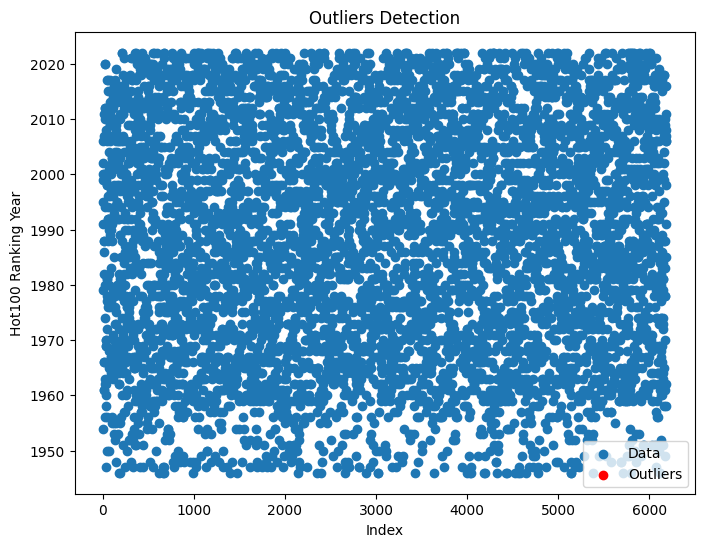

Number of outliers: 0
Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64
Song                   6191
Album                  6191
Album Release Date     6191
Artist Names           6191
Artist(s) Genres       6191
Hot100 Ranking Year    6191
Hot100 Rank            6191
Song Length(ms)        6191
Spotify Link           6191
Song Image             6191
Spotify URI            6191
Popularity             6191
Acousticness           6191
D

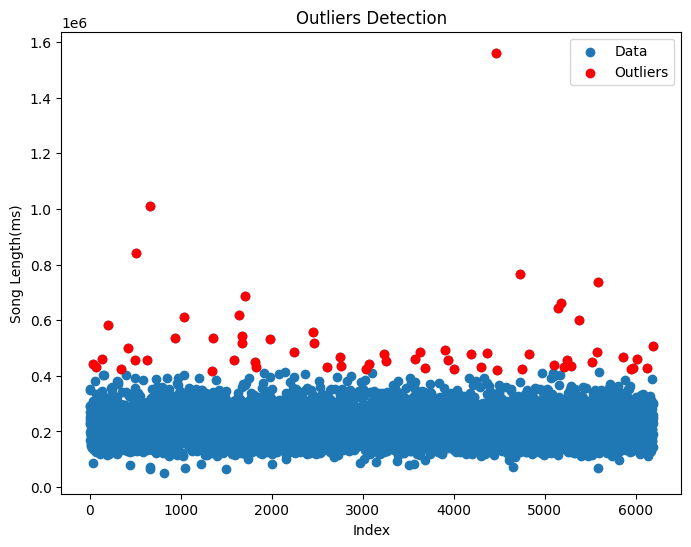

Number of outliers: 62
Song                   62
Album                  62
Album Release Date     62
Artist Names           62
Artist(s) Genres       62
Hot100 Ranking Year    62
Hot100 Rank            62
Song Length(ms)        62
Spotify Link           62
Song Image             62
Spotify URI            62
Popularity             62
Acousticness           62
Danceability           62
Energy                 62
Instrumentalness       62
Liveness               62
Loudness               62
Speechiness            62
Tempo                  62
Valence                62
Key                    62
Mode                   62
Time Signature         62
dtype: int64


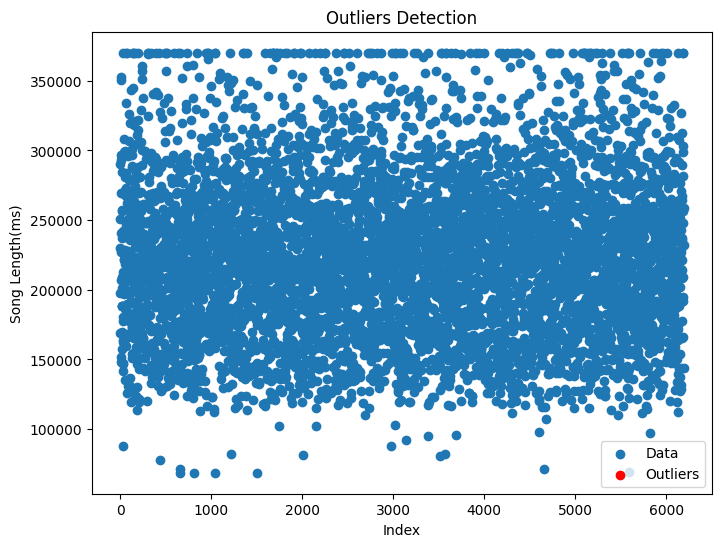

Number of outliers: 0
Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64


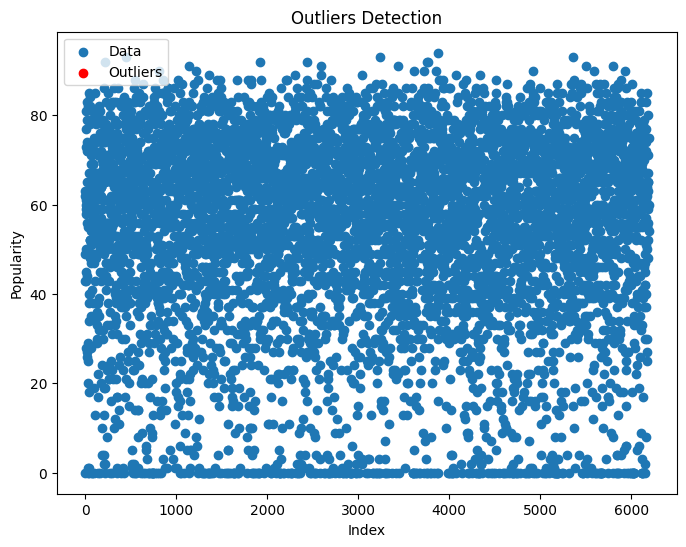

Number of outliers: 0
Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64


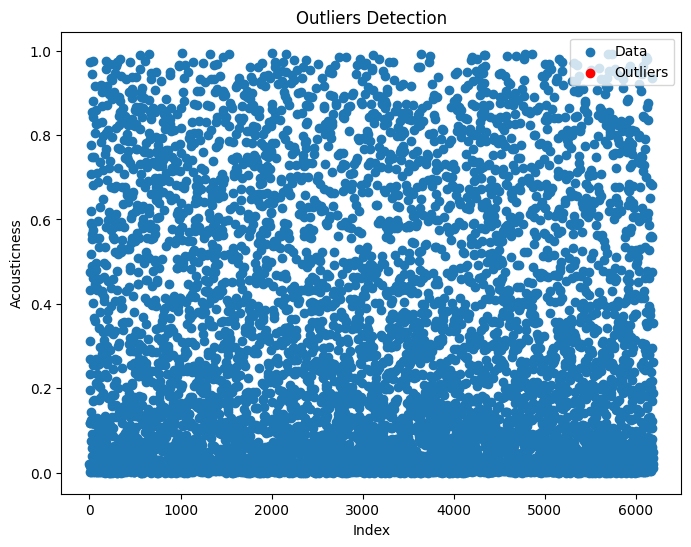

Number of outliers: 0
Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64


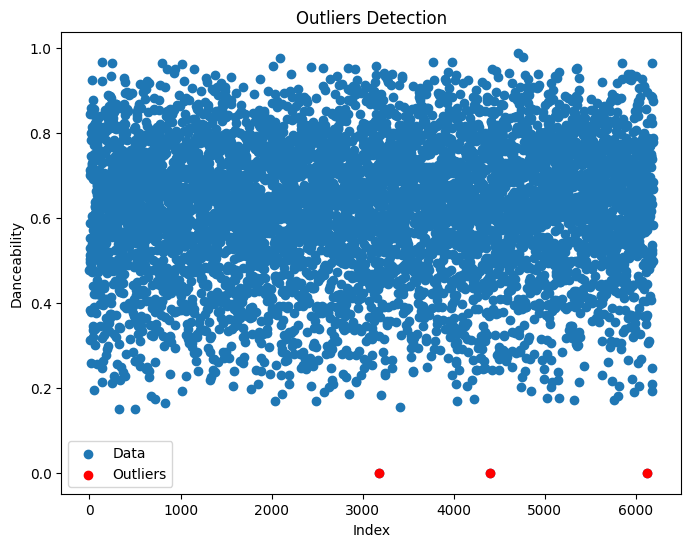

Number of outliers: 3
Song                   3
Album                  3
Album Release Date     3
Artist Names           3
Artist(s) Genres       3
Hot100 Ranking Year    3
Hot100 Rank            3
Song Length(ms)        3
Spotify Link           3
Song Image             3
Spotify URI            3
Popularity             3
Acousticness           3
Danceability           3
Energy                 3
Instrumentalness       3
Liveness               3
Loudness               3
Speechiness            3
Tempo                  3
Valence                3
Key                    3
Mode                   3
Time Signature         3
dtype: int64


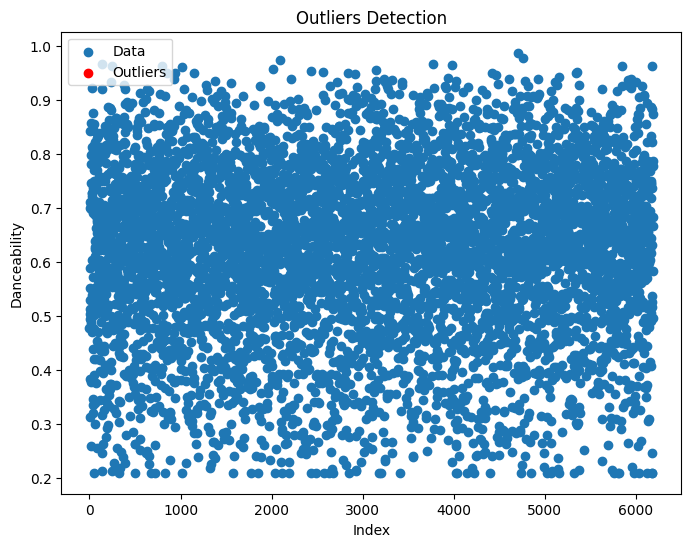

Number of outliers: 0
Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64


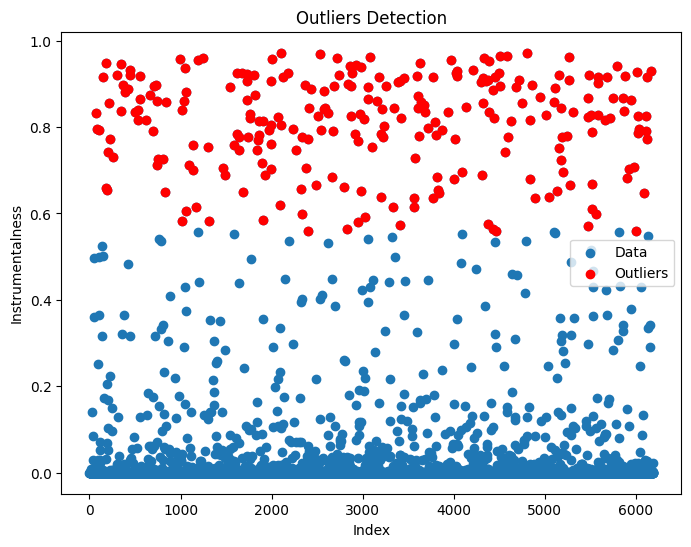

Number of outliers: 259
Song                   259
Album                  259
Album Release Date     259
Artist Names           259
Artist(s) Genres       259
Hot100 Ranking Year    259
Hot100 Rank            259
Song Length(ms)        259
Spotify Link           259
Song Image             259
Spotify URI            259
Popularity             259
Acousticness           259
Danceability           259
Energy                 259
Instrumentalness       259
Liveness               259
Loudness               259
Speechiness            259
Tempo                  259
Valence                259
Key                    259
Mode                   259
Time Signature         259
dtype: int64


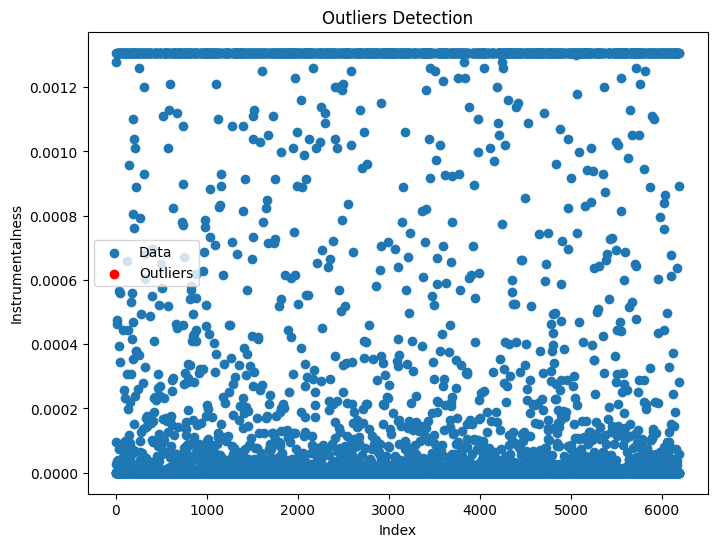

Number of outliers: 0
Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64


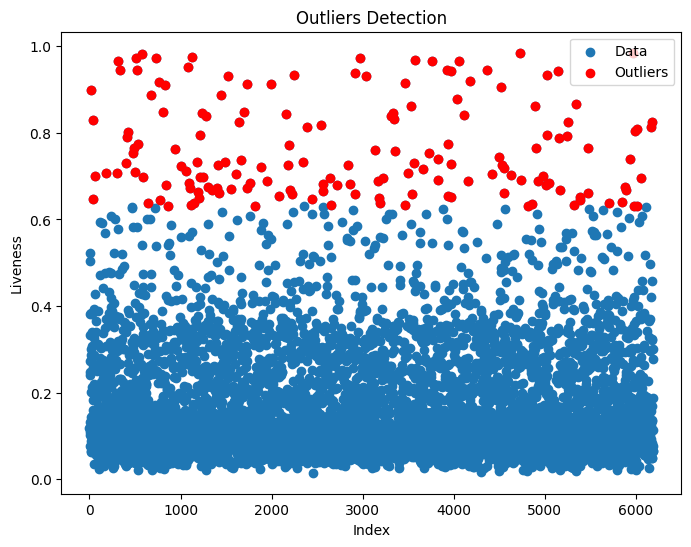

Number of outliers: 163
Song                   163
Album                  163
Album Release Date     163
Artist Names           163
Artist(s) Genres       163
Hot100 Ranking Year    163
Hot100 Rank            163
Song Length(ms)        163
Spotify Link           163
Song Image             163
Spotify URI            163
Popularity             163
Acousticness           163
Danceability           163
Energy                 163
Instrumentalness       163
Liveness               163
Loudness               163
Speechiness            163
Tempo                  163
Valence                163
Key                    163
Mode                   163
Time Signature         163
dtype: int64


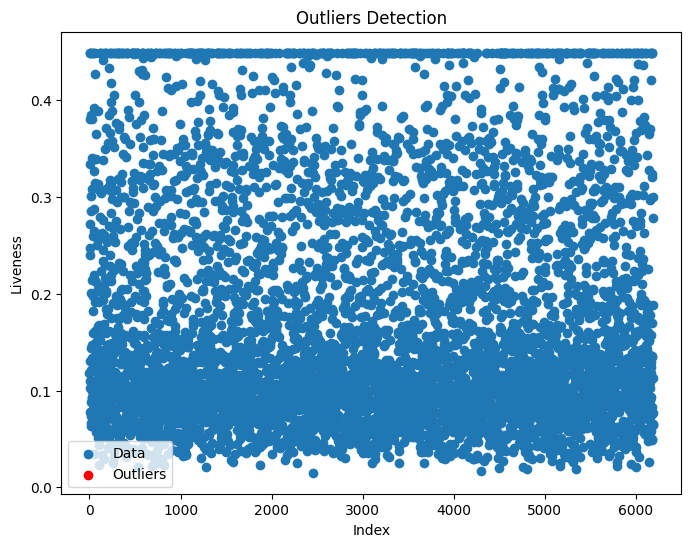

Number of outliers: 0
Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64


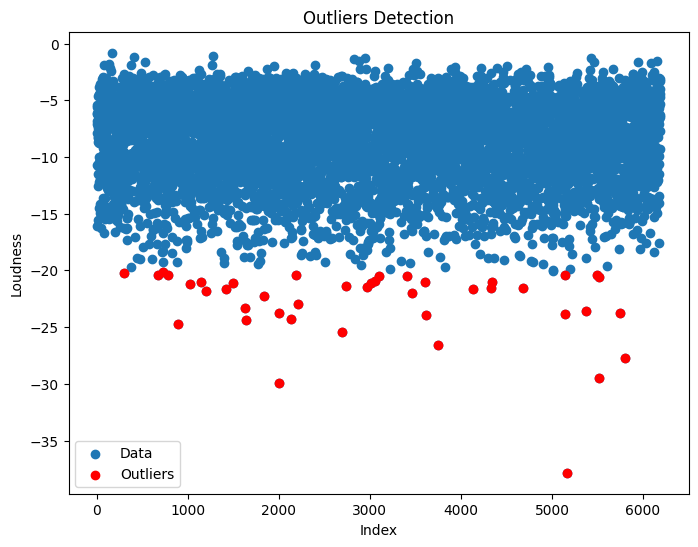

Number of outliers: 42
Song                   42
Album                  42
Album Release Date     42
Artist Names           42
Artist(s) Genres       42
Hot100 Ranking Year    42
Hot100 Rank            42
Song Length(ms)        42
Spotify Link           42
Song Image             42
Spotify URI            42
Popularity             42
Acousticness           42
Danceability           42
Energy                 42
Instrumentalness       42
Liveness               42
Loudness               42
Speechiness            42
Tempo                  42
Valence                42
Key                    42
Mode                   42
Time Signature         42
dtype: int64


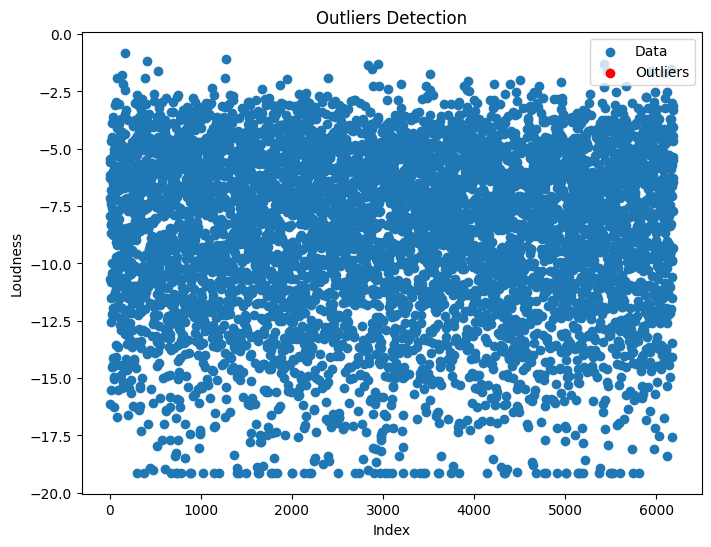

Number of outliers: 0
Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64


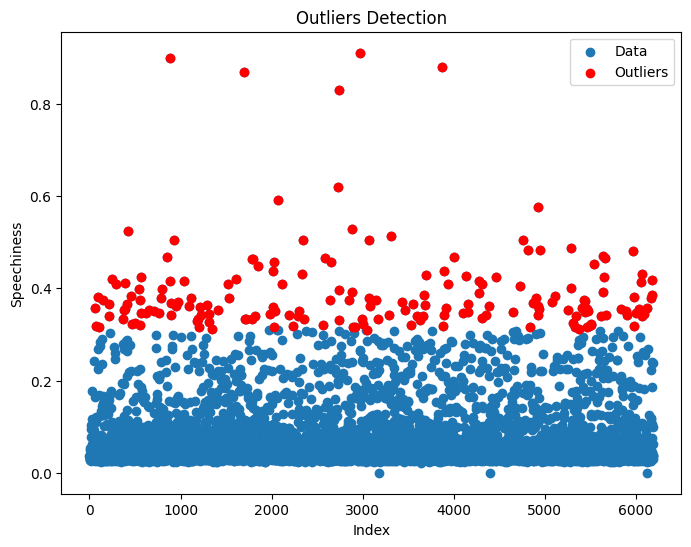

Number of outliers: 182
Song                   182
Album                  182
Album Release Date     182
Artist Names           182
Artist(s) Genres       182
Hot100 Ranking Year    182
Hot100 Rank            182
Song Length(ms)        182
Spotify Link           182
Song Image             182
Spotify URI            182
Popularity             182
Acousticness           182
Danceability           182
Energy                 182
Instrumentalness       182
Liveness               182
Loudness               182
Speechiness            182
Tempo                  182
Valence                182
Key                    182
Mode                   182
Time Signature         182
dtype: int64


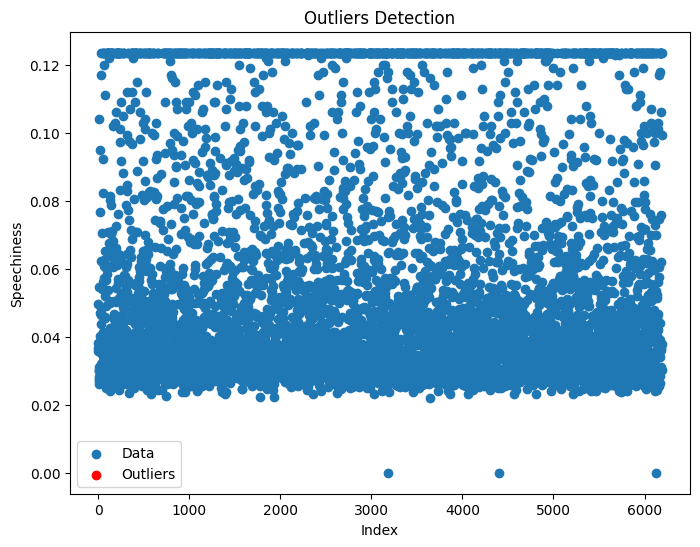

Number of outliers: 0
Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64


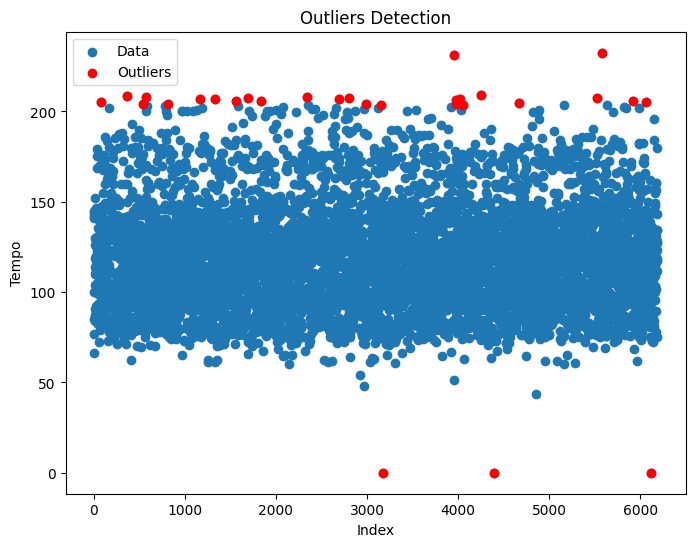

Number of outliers: 29
Song                   29
Album                  29
Album Release Date     29
Artist Names           29
Artist(s) Genres       29
Hot100 Ranking Year    29
Hot100 Rank            29
Song Length(ms)        29
Spotify Link           29
Song Image             29
Spotify URI            29
Popularity             29
Acousticness           29
Danceability           29
Energy                 29
Instrumentalness       29
Liveness               29
Loudness               29
Speechiness            29
Tempo                  29
Valence                29
Key                    29
Mode                   29
Time Signature         29
dtype: int64


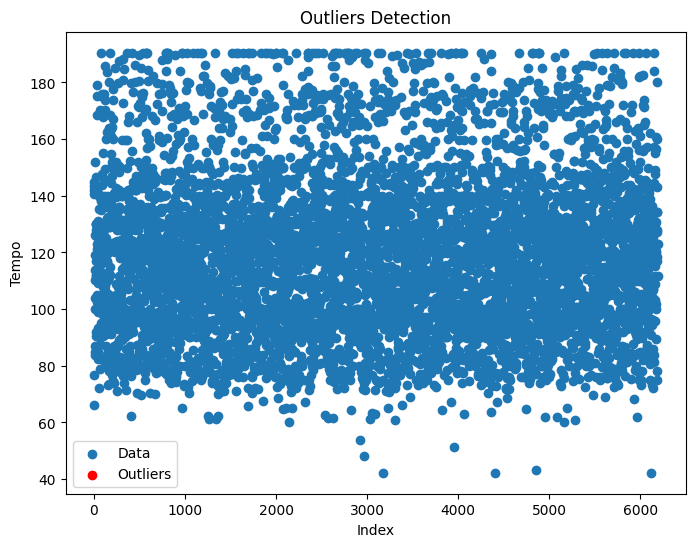

Number of outliers: 0
Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64


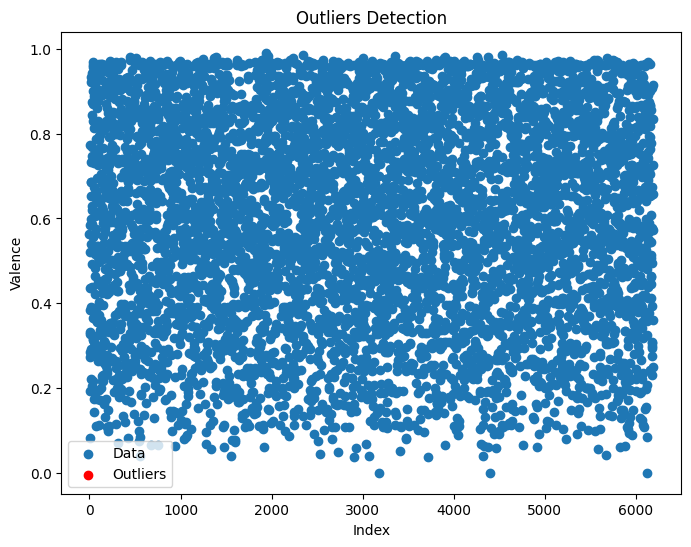

Number of outliers: 0
Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64


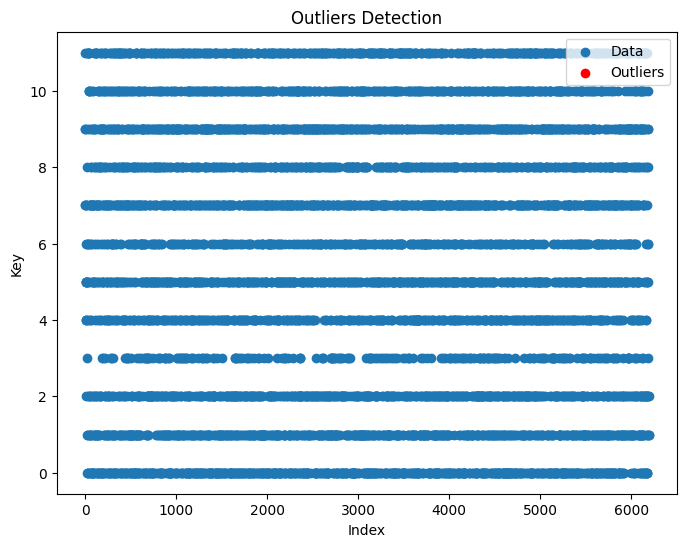

Number of outliers: 0
Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64


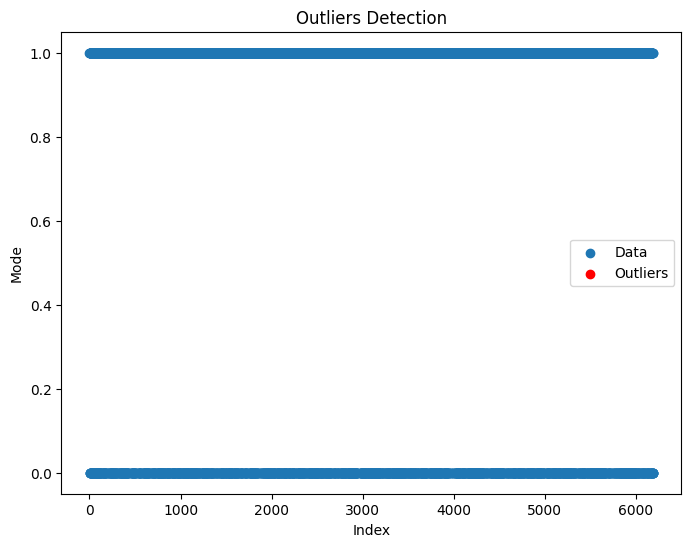

Number of outliers: 0
Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64


In [449]:

out = visualize_outliers(data, 'Hot100 Ranking Year')
print(out.count())
# No Outliers detected

data['Hot100 Ranking Year'] = replace_outlier(data, 'Hot100 Ranking Year')
print(data.count())


out = visualize_outliers(data, 'Song Length(ms)')
print(out.count())
# Outliers detected

data['Song Length(ms)'] = replace_outlier(data, 'Song Length(ms)')
out = visualize_outliers(data, 'Song Length(ms)')
print(out.count())
# Outliers replaced

out = visualize_outliers(data, 'Popularity')
print(out.count())
# No outliers detected


out = visualize_outliers(data, 'Acousticness')
print(out.count())
# No outliers detected


out = visualize_outliers(data, 'Danceability')
print(out.count())
# Outliers Detected

data['Danceability'] = replace_outlier(data, 'Danceability')
out = visualize_outliers(data, 'Danceability')
print(out.count())
# Outliers replaced


out = visualize_outliers(data, 'Instrumentalness')
print(out.count())
# Outliers Detected

data['Instrumentalness'] = replace_outlier(data, 'Instrumentalness')
out = visualize_outliers(data, 'Instrumentalness')
print(out.count())
# Outliers replaced


out = visualize_outliers(data, 'Liveness')
print(out.count())
# Outliers Detected


data['Liveness'] = replace_outlier(data, 'Liveness')
out = visualize_outliers(data, 'Liveness')
print(out.count())
# Outliers replaced


out = visualize_outliers(data, 'Loudness')
print(out.count())
# Outliers Detected

data['Loudness'] = replace_outlier(data, 'Loudness')
out = visualize_outliers(data, 'Loudness')
print(out.count())
# Outliers replaced


out = visualize_outliers(data, 'Speechiness')
print(out.count())
# Outliers Detected

data['Speechiness'] = replace_outlier(data, 'Speechiness')
out = visualize_outliers(data, 'Speechiness')
print(out.count())
# Outliers replaced


out = visualize_outliers(data, 'Tempo')
print(out.count())
# Outliers Detected

data['Tempo'] = replace_outlier(data, 'Tempo')
out = visualize_outliers(data, 'Tempo')
print(out.count())
# Outliers replaced


out = visualize_outliers(data, 'Valence')
print(out.count())
# NO Outliers Detected


out = visualize_outliers(data, 'Key')
print(out.count())
# NO Outliers Detected

out = visualize_outliers(data, 'Mode')
print(out.count())
# NO Outliers Detected


# #############################NOT SURE HERE 5ALA KOLO 4 ??
# out = visualize_outliers(data, 'Time Signature')
# print(out.count())
# # Outliers Detected

# data['Time Signature'] = replace_outlier(data, 'Time Signature')
# out = visualize_outliers(data, 'Time Signature')
# print(out.count())
# # Outliers replaced

In [450]:
data.count()

Song                   6191
Album                  6191
Album Release Date     6191
Artist Names           6191
Artist(s) Genres       6191
Hot100 Ranking Year    6191
Hot100 Rank            6191
Song Length(ms)        6191
Spotify Link           6191
Song Image             6191
Spotify URI            6191
Popularity             6191
Acousticness           6191
Danceability           6191
Energy                 6191
Instrumentalness       6191
Liveness               6191
Loudness               6191
Speechiness            6191
Tempo                  6191
Valence                6191
Key                    6191
Mode                   6191
Time Signature         6191
dtype: int64

In [451]:
data = data.drop('Song Image', axis = 1)
data = data.drop('Spotify Link', axis = 1)
data = data.drop('Spotify URI', axis = 1)
data = data.drop('Song', axis = 1)
data = data.drop('Album', axis = 1)

In [452]:
print(data.head())

  Album Release Date                   Artist Names  \
0          1/30/2001                ['LeAnn Rimes']   
1          8/31/1998                     ['Tyrese']   
2               1979                  ['Rex Smith']   
3               1945  ['Doris Day', 'The Mellomen']   
4          8/16/2011           ['The Karaoke Crew']   

                                    Artist(s) Genres  Hot100 Ranking Year  \
0  ['country dawn', 'contemporary country', 'coun...                 2000   
1  ['hip pop', 'contemporary r&b', 'urban contemp...                 1999   
2                                  ['bubblegum pop']                 1979   
3  ['adult standards', 'easy listening', 'movie t...                 1954   
4                                        ['karaoke']                 2006   

   Hot100 Rank  Song Length(ms)  Popularity  Acousticness  Danceability  \
0           44         229826.0          62        0.0200         0.478   
1           43         290600.0          63        0.233

In [453]:
data

,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
0,1/30/2001,['LeAnn Rimes'],"['country dawn', 'contemporary country', 'coun...",2000,44,229826.0,62,0.0200,0.478,0.736,0.000096,0.1180,-7.124,0.03670,144.705,0.564,7,1,4
1,8/31/1998,['Tyrese'],"['hip pop', 'contemporary r&b', 'urban contemp...",1999,43,290600.0,63,0.2330,0.588,0.522,0.000000,0.2400,-6.254,0.03830,66.024,0.584,9,0,4
2,1979,['Rex Smith'],['bubblegum pop'],1979,86,197453.0,49,0.4760,0.313,0.600,0.000026,0.4492,-7.913,0.03570,141.912,0.272,11,1,4
3,1945,"['Doris Day', 'The Mellomen']","['adult standards', 'easy listening', 'movie t...",1954,20,169066.0,43,0.9730,0.503,0.059,0.000000,0.1030,-16.131,0.04970,76.642,0.331,9,1,4
4,8/16/2011,['The Karaoke Crew'],['karaoke'],2006,50,251013.0,0,0.0149,0.843,0.348,0.001280,0.2470,-10.669,0.05450,143.595,0.385,7,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6186,4/9/1990,['Black Box'],"['italo house', 'hip house', 'diva house', 'eu...",1991,88,298691.0,56,0.0116,0.875,0.862,0.000281,0.0658,-7.694,0.06200,118.398,0.915,6,0,4
6187,1/1/2005,"['Chamillionaire', 'Krayzie Bone']","['gangster rap', 'southern hip hop', 'ohio hip...",2006,8,303053.0,71,0.1890,0.787,0.799,0.000000,0.3000,-4.680,0.09930,143.052,0.835,8,0,4
6188,11/21/2005,"['Fort Minor', 'Holly Brook', 'Jonah Matranga']","['rap rock', 'lilith']",2006,43,231866.0,60,0.2620,0.684,0.819,0.001308,0.1130,-3.309,0.12355,179.999,0.250,1,0,4
6189,7/3/2007,['Sara Bareilles'],"['neo mellow', 'post-teen pop', 'lilith', 'pop...",2008,7,258826.0,75,0.0208,0.583,0.786,0.000000,0.1880,-3.142,0.03010,123.055,0.573,2,0,4


In [454]:
from collections import Counter

# Initialize a Counter to count genre occurrences
genre_counter = Counter()

# Iterate through the values in the 'Artist(s) Genres' column
for value in data['Artist(s) Genres']:
    genre_list = value.split(',')
    for genre in genre_list:
        cleaned_genre = genre.strip().strip("'][").replace("'", "")  # Clean up the genre string
        genre_counter[cleaned_genre] += 1  # Increment the count for each genre

# Get the top 20 most common genres
top_genres = [genre for genre, count in genre_counter.most_common(40)]

# Function to assign genre based on top 20 or 'Others'
def assign_genre(genre):
    if genre in top_genres:
        return genre
    else:
        return 'Others'

# Create the new 'Genre' feature
data['Genre'] = data['Artist(s) Genres'].apply(lambda x: [assign_genre(genre.strip().strip("'][").replace("'", "")) for genre in x.split(',')])

# If a row has multiple genres, choose the first genre from the list
data['Genre'] = data['Genre'].apply(lambda x: x[0])




In [455]:
data.count()

Album Release Date     6191
Artist Names           6191
Artist(s) Genres       6191
Hot100 Ranking Year    6191
Hot100 Rank            6191
Song Length(ms)        6191
Popularity             6191
Acousticness           6191
Danceability           6191
Energy                 6191
Instrumentalness       6191
Liveness               6191
Loudness               6191
Speechiness            6191
Tempo                  6191
Valence                6191
Key                    6191
Mode                   6191
Time Signature         6191
Genre                  6191
dtype: int64

In [456]:
data['Genre'].unique()

array(['Others', 'hip pop', 'bubblegum pop', 'adult standards', 'karaoke',
       'new wave pop', 'pop', 'folk rock', 'easy listening',
       'rock-and-roll', 'country rock', 'dance pop', 'rockabilly', 'soul',
       'motown', 'heartland rock', 'country', 'classic rock',
       'contemporary r&b', 'atl hip hop', 'new jack swing',
       'urban contemporary', 'disco', 'contemporary country',
       'southern hip hop', 'pop rap', 'gangster rap', 'classic soul',
       'soft rock', 'rock', 'mellow gold', 'hip hop', 'rap', 'trap',
       'quiet storm', 'album rock', 'funk', 'r&b', 'hard rock',
       'singer-songwriter'], dtype=object)

In [457]:
data['Genre']

0                Others
1               hip pop
2         bubblegum pop
3       adult standards
4               karaoke
             ...       
6186             Others
6187       gangster rap
6188             Others
6189             Others
6190      rock-and-roll
Name: Genre, Length: 6191, dtype: object

In [458]:
data.isnull().sum()

Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
Genre                  0
dtype: int64

In [459]:
data.count()

Album Release Date     6191
Artist Names           6191
Artist(s) Genres       6191
Hot100 Ranking Year    6191
Hot100 Rank            6191
Song Length(ms)        6191
Popularity             6191
Acousticness           6191
Danceability           6191
Energy                 6191
Instrumentalness       6191
Liveness               6191
Loudness               6191
Speechiness            6191
Tempo                  6191
Valence                6191
Key                    6191
Mode                   6191
Time Signature         6191
Genre                  6191
dtype: int64

In [460]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Album Release Date   6191 non-null   object 
 1   Artist Names         6191 non-null   object 
 2   Artist(s) Genres     6191 non-null   object 
 3   Hot100 Ranking Year  6191 non-null   int64  
 4   Hot100 Rank          6191 non-null   int64  
 5   Song Length(ms)      6191 non-null   float64
 6   Popularity           6191 non-null   int64  
 7   Acousticness         6191 non-null   float64
 8   Danceability         6191 non-null   float64
 9   Energy               6191 non-null   float64
 10  Instrumentalness     6191 non-null   float64
 11  Liveness             6191 non-null   float64
 12  Loudness             6191 non-null   float64
 13  Speechiness          6191 non-null   float64
 14  Tempo                6191 non-null   float64
 15  Valence              6191 non-null   f

In [461]:
# Write the modified data to a new CSV file
data.to_csv('modified_data.csv', index=False)


In [462]:
def extract_year_and_month(date_str):
    try:
        date_obj = pd.to_datetime(date_str, errors='coerce')
        year = date_obj.year
        month = date_obj.month
        return pd.Series([year, month])
    except:
        return pd.Series([None, None])

# Apply the function to extract year and month from each date string
data[['Release Year', 'Release Month']] = data['Album Release Date'].apply(extract_year_and_month)

print(data[['Release Year', 'Release Month']])  # Check the extracted year and month

# Fill NaN values in the 'Release Year' and 'Release Month' columns
data['Release Year'] = data['Release Year'].fillna(data['Album Release Date'])
data['Release Month'] = data['Release Month'].fillna(data['Album Release Date'])

print(data)  # Print the DataFrame after filling NaN values



      Release Year  Release Month
0             2001              1
1             1998              8
2             1979              1
3             1945              1
4             2011              8
...            ...            ...
6186          1990              4
6187          2005              1
6188          2005             11
6189          2007              7
6190          1998              1

[6191 rows x 2 columns]
     Album Release Date                                     Artist Names  \
0             1/30/2001                                  ['LeAnn Rimes']   
1             8/31/1998                                       ['Tyrese']   
2                  1979                                    ['Rex Smith']   
3                  1945                    ['Doris Day', 'The Mellomen']   
4             8/16/2011                             ['The Karaoke Crew']   
...                 ...                                              ...   
6186           4/9/1990            

In [463]:
data.head()

,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,...,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,Genre,Release Year,Release Month
0,1/30/2001,['LeAnn Rimes'],"['country dawn', 'contemporary country', 'coun...",2000,44,229826.0,62,0.0200,0.478,0.736,...,-7.124,0.0367,144.705,0.564,7,1,4,Others,2001,1
1,8/31/1998,['Tyrese'],"['hip pop', 'contemporary r&b', 'urban contemp...",1999,43,290600.0,63,0.2330,0.588,0.522,...,-6.254,0.0383,66.024,0.584,9,0,4,hip pop,1998,8
2,1979,['Rex Smith'],['bubblegum pop'],1979,86,197453.0,49,0.4760,0.313,0.600,...,-7.913,0.0357,141.912,0.272,11,1,4,bubblegum pop,1979,1
3,1945,"['Doris Day', 'The Mellomen']","['adult standards', 'easy listening', 'movie t...",1954,20,169066.0,43,0.9730,0.503,0.059,...,-16.131,0.0497,76.642,0.331,9,1,4,adult standards,1945,1
4,8/16/2011,['The Karaoke Crew'],['karaoke'],2006,50,251013.0,0,0.0149,0.843,0.348,...,-10.669,0.0545,143.595,0.385,7,0,4,karaoke,2011,8


In [464]:
# Write the modified data to a new CSV file
data.to_csv('modified_data.csv', index=False)


In [465]:
data = data.drop(columns= 'Album Release Date')

In [466]:
data.head()

,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,...,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,Genre,Release Year,Release Month
0,['LeAnn Rimes'],"['country dawn', 'contemporary country', 'coun...",2000,44,229826.0,62,0.0200,0.478,0.736,0.000096,...,-7.124,0.0367,144.705,0.564,7,1,4,Others,2001,1
1,['Tyrese'],"['hip pop', 'contemporary r&b', 'urban contemp...",1999,43,290600.0,63,0.2330,0.588,0.522,0.000000,...,-6.254,0.0383,66.024,0.584,9,0,4,hip pop,1998,8
2,['Rex Smith'],['bubblegum pop'],1979,86,197453.0,49,0.4760,0.313,0.600,0.000026,...,-7.913,0.0357,141.912,0.272,11,1,4,bubblegum pop,1979,1
3,"['Doris Day', 'The Mellomen']","['adult standards', 'easy listening', 'movie t...",1954,20,169066.0,43,0.9730,0.503,0.059,0.000000,...,-16.131,0.0497,76.642,0.331,9,1,4,adult standards,1945,1
4,['The Karaoke Crew'],['karaoke'],2006,50,251013.0,0,0.0149,0.843,0.348,0.001280,...,-10.669,0.0545,143.595,0.385,7,0,4,karaoke,2011,8


In [467]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Artist Names         6191 non-null   object 
 1   Artist(s) Genres     6191 non-null   object 
 2   Hot100 Ranking Year  6191 non-null   int64  
 3   Hot100 Rank          6191 non-null   int64  
 4   Song Length(ms)      6191 non-null   float64
 5   Popularity           6191 non-null   int64  
 6   Acousticness         6191 non-null   float64
 7   Danceability         6191 non-null   float64
 8   Energy               6191 non-null   float64
 9   Instrumentalness     6191 non-null   float64
 10  Liveness             6191 non-null   float64
 11  Loudness             6191 non-null   float64
 12  Speechiness          6191 non-null   float64
 13  Tempo                6191 non-null   float64
 14  Valence              6191 non-null   float64
 15  Key                  6191 non-null   i

In [468]:
# Initialize a new list to store the counts
counts_list = []

# Loop through the list data feature
for item_list in data['Artist Names']:
    # Split the item based on both commas and ampersands
    values = item_list.replace('&', ',').split(',')  # Replace ampersands with commas and then split
    # Count the number of non-empty and non-whitespace values after stripping
    count = sum(1 for value in values if value.strip())
    # Append the count to the counts_list
    counts_list.append(count)

# Create a new feature containing the counts as integers
data['Counts'] = counts_list

# Convert the 'Counts' column to type integer
data['Counts'] = data['Counts'].astype(int)

# Write the modified data to a new CSV file
data.to_csv('modified_data.csv', index=False)


In [469]:
mode = data['Counts'].mode()
mode

0    1
Name: Counts, dtype: int64

In [470]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Artist Names         6191 non-null   object 
 1   Artist(s) Genres     6191 non-null   object 
 2   Hot100 Ranking Year  6191 non-null   int64  
 3   Hot100 Rank          6191 non-null   int64  
 4   Song Length(ms)      6191 non-null   float64
 5   Popularity           6191 non-null   int64  
 6   Acousticness         6191 non-null   float64
 7   Danceability         6191 non-null   float64
 8   Energy               6191 non-null   float64
 9   Instrumentalness     6191 non-null   float64
 10  Liveness             6191 non-null   float64
 11  Loudness             6191 non-null   float64
 12  Speechiness          6191 non-null   float64
 13  Tempo                6191 non-null   float64
 14  Valence              6191 non-null   float64
 15  Key                  6191 non-null   i

In [471]:
data.isnull().sum()

Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
Genre                  0
Release Year           0
Release Month          0
Counts                 0
dtype: int64

In [472]:
data.head()

,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,...,Speechiness,Tempo,Valence,Key,Mode,Time Signature,Genre,Release Year,Release Month,Counts
0,['LeAnn Rimes'],"['country dawn', 'contemporary country', 'coun...",2000,44,229826.0,62,0.0200,0.478,0.736,0.000096,...,0.0367,144.705,0.564,7,1,4,Others,2001,1,1
1,['Tyrese'],"['hip pop', 'contemporary r&b', 'urban contemp...",1999,43,290600.0,63,0.2330,0.588,0.522,0.000000,...,0.0383,66.024,0.584,9,0,4,hip pop,1998,8,1
2,['Rex Smith'],['bubblegum pop'],1979,86,197453.0,49,0.4760,0.313,0.600,0.000026,...,0.0357,141.912,0.272,11,1,4,bubblegum pop,1979,1,1
3,"['Doris Day', 'The Mellomen']","['adult standards', 'easy listening', 'movie t...",1954,20,169066.0,43,0.9730,0.503,0.059,0.000000,...,0.0497,76.642,0.331,9,1,4,adult standards,1945,1,2
4,['The Karaoke Crew'],['karaoke'],2006,50,251013.0,0,0.0149,0.843,0.348,0.001280,...,0.0545,143.595,0.385,7,0,4,karaoke,2011,8,1


In [473]:
data.count()

Artist Names           6191
Artist(s) Genres       6191
Hot100 Ranking Year    6191
Hot100 Rank            6191
Song Length(ms)        6191
Popularity             6191
Acousticness           6191
Danceability           6191
Energy                 6191
Instrumentalness       6191
Liveness               6191
Loudness               6191
Speechiness            6191
Tempo                  6191
Valence                6191
Key                    6191
Mode                   6191
Time Signature         6191
Genre                  6191
Release Year           6191
Release Month          6191
Counts                 6191
dtype: int64

In [474]:
data = data.drop(columns= 'Artist Names', axis=1)

In [475]:
data.head()

,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,...,Speechiness,Tempo,Valence,Key,Mode,Time Signature,Genre,Release Year,Release Month,Counts
0,"['country dawn', 'contemporary country', 'coun...",2000,44,229826.0,62,0.0200,0.478,0.736,0.000096,0.1180,...,0.0367,144.705,0.564,7,1,4,Others,2001,1,1
1,"['hip pop', 'contemporary r&b', 'urban contemp...",1999,43,290600.0,63,0.2330,0.588,0.522,0.000000,0.2400,...,0.0383,66.024,0.584,9,0,4,hip pop,1998,8,1
2,['bubblegum pop'],1979,86,197453.0,49,0.4760,0.313,0.600,0.000026,0.4492,...,0.0357,141.912,0.272,11,1,4,bubblegum pop,1979,1,1
3,"['adult standards', 'easy listening', 'movie t...",1954,20,169066.0,43,0.9730,0.503,0.059,0.000000,0.1030,...,0.0497,76.642,0.331,9,1,4,adult standards,1945,1,2
4,['karaoke'],2006,50,251013.0,0,0.0149,0.843,0.348,0.001280,0.2470,...,0.0545,143.595,0.385,7,0,4,karaoke,2011,8,1


In [476]:
data = data.drop(columns= 'Artist(s) Genres', axis=1)
data.head()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,Genre,Release Year,Release Month,Counts
0,2000,44,229826.0,62,0.0200,0.478,0.736,0.000096,0.1180,-7.124,0.0367,144.705,0.564,7,1,4,Others,2001,1,1
1,1999,43,290600.0,63,0.2330,0.588,0.522,0.000000,0.2400,-6.254,0.0383,66.024,0.584,9,0,4,hip pop,1998,8,1
2,1979,86,197453.0,49,0.4760,0.313,0.600,0.000026,0.4492,-7.913,0.0357,141.912,0.272,11,1,4,bubblegum pop,1979,1,1
3,1954,20,169066.0,43,0.9730,0.503,0.059,0.000000,0.1030,-16.131,0.0497,76.642,0.331,9,1,4,adult standards,1945,1,2
4,2006,50,251013.0,0,0.0149,0.843,0.348,0.001280,0.2470,-10.669,0.0545,143.595,0.385,7,0,4,karaoke,2011,8,1


In [477]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['Genre'] = label_encoder.fit_transform(data['Genre'])
data['Genre']

0        0
1       20
2        4
3        1
4       21
        ..
6186     0
6187    16
6188     0
6189     0
6190    32
Name: Genre, Length: 6191, dtype: int64

In [478]:
data['Genre'].unique()

array([ 0, 20,  4,  1, 21, 25, 26, 14, 13, 32, 10, 11, 33, 36, 23, 18,  9,
        5,  8,  3, 24, 39, 12,  7, 37, 27, 16,  6, 35, 31, 22, 19, 30, 38,
       28,  2, 15, 29, 17, 34])

In [479]:
# Write the modified data to a new CSV file
data.to_csv('modified_data.csv', index=False)

In [480]:
data.corr()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,Genre,Release Year,Release Month,Counts
Hot100 Ranking Year,1.000000,0.130388,0.327119,0.503405,-0.554408,0.331916,0.376876,-0.188400,-0.052759,0.533476,0.311312,0.033584,-0.189059,0.036983,-0.178375,0.157563,0.085468,0.627083,0.143335,0.133758
Hot100 Rank,0.130388,1.000000,0.087487,-0.075731,-0.155992,0.013405,0.120496,-0.012495,-0.012938,0.053451,0.018958,0.033722,0.007785,0.023193,-0.007144,0.039784,-0.009804,0.040338,-0.012818,-0.010394
Song Length(ms),0.327119,0.087487,1.000000,0.178362,-0.341281,0.105640,0.145303,0.065572,-0.042663,0.081569,0.023433,-0.030348,-0.159897,0.009300,-0.122557,0.094070,0.121036,0.090575,0.025393,0.047127
Popularity,0.503405,-0.075731,0.178362,1.000000,-0.326027,0.158992,0.289564,-0.223447,-0.068448,0.385232,0.136131,0.035137,-0.039074,0.025431,-0.107376,0.087910,0.041768,0.088246,0.065796,0.022963
Acousticness,-0.554408,-0.155992,-0.341281,-0.326027,1.000000,-0.373421,-0.608972,0.003636,0.051553,-0.453212,-0.212100,-0.097062,-0.161632,-0.041104,0.167199,-0.224912,-0.091026,-0.301150,-0.059633,-0.054064
Danceability,0.331916,0.013405,0.105640,0.158992,-0.373421,1.000000,0.245718,0.006409,-0.133683,0.178590,0.314050,-0.094787,0.418573,0.025474,-0.186579,0.209226,0.115259,0.212896,0.054941,0.105579
Energy,0.376876,0.120496,0.145303,0.289564,-0.608972,0.245718,1.000000,-0.044638,0.090756,0.719234,0.233875,0.150477,0.381038,0.017890,-0.099781,0.212437,0.033457,0.206691,0.038512,0.046172
Instrumentalness,-0.188400,-0.012495,0.065572,-0.223447,0.003636,0.006409,-0.044638,1.000000,-0.041485,-0.247348,-0.127662,-0.020984,0.044341,-0.010924,-0.010749,-0.019701,0.006051,-0.088415,0.007586,-0.087465
Liveness,-0.052759,-0.012938,-0.042663,-0.068448,0.051553,-0.133683,0.090756,-0.041485,1.000000,0.048883,0.092863,0.000076,-0.001041,0.023423,0.031061,-0.022114,-0.011598,0.005225,0.025208,0.051480
Loudness,0.533476,0.053451,0.081569,0.385232,-0.453212,0.178590,0.719234,-0.247348,0.048883,1.000000,0.225092,0.085178,0.075644,0.017637,-0.099645,0.125309,0.012419,0.372144,0.100452,0.108993


In [481]:
# Min-Max Scaling
min_val = np.min(data)
max_val = np.max(data)
normalized_data = (data - min_val) / (max_val - min_val)

print("Original data:", data)
print("Normalized data (Min-Max Scaling):", normalized_data)

Original data:       Hot100 Ranking Year  Hot100 Rank  Song Length(ms)  Popularity  \
0                    2000           44         229826.0          62   
1                    1999           43         290600.0          63   
2                    1979           86         197453.0          49   
3                    1954           20         169066.0          43   
4                    2006           50         251013.0           0   
...                   ...          ...              ...         ...   
6186                 1991           88         298691.0          56   
6187                 2006            8         303053.0          71   
6188                 2006           43         231866.0          60   
6189                 2008            7         258826.0          75   
6190                 1962           75         143826.0          54   

      Acousticness  Danceability  Energy  Instrumentalness  Liveness  \
0           0.0200         0.478   0.736          0.000096  

In [482]:
data.head()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,Genre,Release Year,Release Month,Counts
0,2000,44,229826.0,62,0.0200,0.478,0.736,0.000096,0.1180,-7.124,0.0367,144.705,0.564,7,1,4,0,2001,1,1
1,1999,43,290600.0,63,0.2330,0.588,0.522,0.000000,0.2400,-6.254,0.0383,66.024,0.584,9,0,4,20,1998,8,1
2,1979,86,197453.0,49,0.4760,0.313,0.600,0.000026,0.4492,-7.913,0.0357,141.912,0.272,11,1,4,4,1979,1,1
3,1954,20,169066.0,43,0.9730,0.503,0.059,0.000000,0.1030,-16.131,0.0497,76.642,0.331,9,1,4,1,1945,1,2
4,2006,50,251013.0,0,0.0149,0.843,0.348,0.001280,0.2470,-10.669,0.0545,143.595,0.385,7,0,4,21,2011,8,1


In [483]:
normalized_data.head()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,Genre,Release Year,Release Month,Counts
0,0.005455,0.000171,0.620931,0.000219,0.000052,0.000053,0.000054,0.000052,0.000052,0.000032,0.000052,0.000443,0.000053,0.000071,0.000054,0.000062,0.000052,0.005457,0.000054,0.000054
1,0.005452,0.000168,0.785113,0.000222,0.000052,0.000053,0.000053,0.000052,0.000052,0.000035,0.000052,0.000230,0.000053,0.000076,0.000052,0.000062,0.000106,0.005449,0.000073,0.000054
2,0.005398,0.000284,0.533474,0.000184,0.000053,0.000053,0.000053,0.000052,0.000053,0.000030,0.000052,0.000435,0.000052,0.000081,0.000054,0.000062,0.000062,0.005398,0.000054,0.000054
3,0.005330,0.000106,0.456786,0.000168,0.000054,0.000053,0.000052,0.000052,0.000052,0.000008,0.000052,0.000259,0.000053,0.000076,0.000054,0.000062,0.000054,0.005306,0.000054,0.000057
4,0.005471,0.000187,0.678168,0.000052,0.000052,0.000054,0.000053,0.000052,0.000052,0.000023,0.000052,0.000440,0.000053,0.000071,0.000052,0.000062,0.000108,0.005484,0.000073,0.000054


In [492]:
data = normalized_data
data

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,Genre,Release Year,Release Month,Counts
0,0.005455,0.000171,0.620931,0.000219,0.000052,0.000053,0.000054,0.000052,0.000052,0.000032,0.000052,0.000443,0.000053,0.000071,0.000054,0.000062,0.000052,0.005457,0.000054,0.000054
1,0.005452,0.000168,0.785113,0.000222,0.000052,0.000053,0.000053,0.000052,0.000052,0.000035,0.000052,0.000230,0.000053,0.000076,0.000052,0.000062,0.000106,0.005449,0.000073,0.000054
2,0.005398,0.000284,0.533474,0.000184,0.000053,0.000053,0.000053,0.000052,0.000053,0.000030,0.000052,0.000435,0.000052,0.000081,0.000054,0.000062,0.000062,0.005398,0.000054,0.000054
3,0.005330,0.000106,0.456786,0.000168,0.000054,0.000053,0.000052,0.000052,0.000052,0.000008,0.000052,0.000259,0.000053,0.000076,0.000054,0.000062,0.000054,0.005306,0.000054,0.000057
4,0.005471,0.000187,0.678168,0.000052,0.000052,0.000054,0.000053,0.000052,0.000052,0.000023,0.000052,0.000440,0.000053,0.000071,0.000052,0.000062,0.000108,0.005484,0.000073,0.000054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6186,0.005430,0.000289,0.806971,0.000203,0.000052,0.000054,0.000054,0.000052,0.000052,0.000031,0.000052,0.000372,0.000054,0.000068,0.000052,0.000062,0.000052,0.005428,0.000062,0.000054
6187,0.005471,0.000073,0.818755,0.000243,0.000052,0.000054,0.000054,0.000052,0.000052,0.000039,0.000052,0.000438,0.000054,0.000073,0.000052,0.000062,0.000095,0.005468,0.000054,0.000057
6188,0.005471,0.000168,0.626442,0.000214,0.000052,0.000054,0.000054,0.000052,0.000052,0.000043,0.000052,0.000538,0.000052,0.000054,0.000052,0.000062,0.000052,0.005468,0.000081,0.000060
6189,0.005476,0.000071,0.699275,0.000254,0.000052,0.000053,0.000054,0.000052,0.000052,0.000043,0.000052,0.000384,0.000053,0.000057,0.000052,0.000062,0.000052,0.005474,0.000071,0.000054


In [493]:
correlation = data.corrwith(data['Popularity'])
print(correlation)


Hot100 Ranking Year    0.503405
Hot100 Rank           -0.075731
Song Length(ms)        0.178362
Popularity             1.000000
Acousticness          -0.326027
Danceability           0.158992
Energy                 0.289564
Instrumentalness      -0.223447
Liveness              -0.068448
Loudness               0.385232
Speechiness            0.136131
Tempo                  0.035137
Valence               -0.039074
Key                    0.025431
Mode                  -0.107376
Time Signature         0.087910
Genre                  0.041768
Release Year           0.088246
Release Month          0.065796
Counts                 0.022963
dtype: float64


In [494]:
x = data.drop(columns= 'Popularity', axis=1)
x

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,Genre,Release Year,Release Month,Counts
0,0.005455,0.000171,0.620931,0.000052,0.000053,0.000054,0.000052,0.000052,0.000032,0.000052,0.000443,0.000053,0.000071,0.000054,0.000062,0.000052,0.005457,0.000054,0.000054
1,0.005452,0.000168,0.785113,0.000052,0.000053,0.000053,0.000052,0.000052,0.000035,0.000052,0.000230,0.000053,0.000076,0.000052,0.000062,0.000106,0.005449,0.000073,0.000054
2,0.005398,0.000284,0.533474,0.000053,0.000053,0.000053,0.000052,0.000053,0.000030,0.000052,0.000435,0.000052,0.000081,0.000054,0.000062,0.000062,0.005398,0.000054,0.000054
3,0.005330,0.000106,0.456786,0.000054,0.000053,0.000052,0.000052,0.000052,0.000008,0.000052,0.000259,0.000053,0.000076,0.000054,0.000062,0.000054,0.005306,0.000054,0.000057
4,0.005471,0.000187,0.678168,0.000052,0.000054,0.000053,0.000052,0.000052,0.000023,0.000052,0.000440,0.000053,0.000071,0.000052,0.000062,0.000108,0.005484,0.000073,0.000054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6186,0.005430,0.000289,0.806971,0.000052,0.000054,0.000054,0.000052,0.000052,0.000031,0.000052,0.000372,0.000054,0.000068,0.000052,0.000062,0.000052,0.005428,0.000062,0.000054
6187,0.005471,0.000073,0.818755,0.000052,0.000054,0.000054,0.000052,0.000052,0.000039,0.000052,0.000438,0.000054,0.000073,0.000052,0.000062,0.000095,0.005468,0.000054,0.000057
6188,0.005471,0.000168,0.626442,0.000052,0.000054,0.000054,0.000052,0.000052,0.000043,0.000052,0.000538,0.000052,0.000054,0.000052,0.000062,0.000052,0.005468,0.000081,0.000060
6189,0.005476,0.000071,0.699275,0.000052,0.000053,0.000054,0.000052,0.000052,0.000043,0.000052,0.000384,0.000053,0.000057,0.000052,0.000062,0.000052,0.005474,0.000071,0.000054


In [495]:
y = data['Popularity']
y

0       0.000219
1       0.000222
2       0.000184
3       0.000168
4       0.000052
          ...   
6186    0.000203
6187    0.000243
6188    0.000214
6189    0.000254
6190    0.000198
Name: Popularity, Length: 6191, dtype: float64

In [496]:
#train test
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, shuffle=True, random_state=60)


In [498]:
#Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)


print("Testing Mean Squared Error:", test_mse)
print("Training Mean Squared Error:", train_mse)

Testing Mean Squared Error: 2.6615406608349695e-35
Training Mean Squared Error: 2.765561506036766e-35
